# Importing and Getting Ready

In [1]:
import numpy as np
import pandas as pd
# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [3]:
df_test_1 = df_test.copy().drop('Customer_id', axis=1)

In [4]:
#y_pred = tuned_clf_model.predict(df_test_1)

#submission = pd.DataFrame ({
#    'Customer_id' : df_test['Customer_id']
#    'Target' : y_pred
#})

#submission['Target'].value_counts()

#submission.to_csv('submission.csv', index=False)

In [5]:
df_test_1.head()

,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,Transaction2,...,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,13341.55,0,0,0,0,0,0,0,0.0,0.0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
1,18649.81,0,1,0,0,0,0,0,0.0,0.0,...,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
2,28311.30,0,1,0,0,1,0,0,0.0,0.0,...,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,18066.61,0,1,0,0,0,0,0,0.0,0.0,...,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
4,10512.30,0,0,0,0,0,0,0,0.0,0.0,...,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375


In [6]:
df_train.head()

,Customer_id,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,...,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,CTSP000001,0,43824.59,0,0,0,0,0,0,0,...,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
1,CTSP000002,1,11256.21,0,0,0,0,0,0,0,...,3,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
2,CTSP000003,1,18795.11,0,1,1,0,0,0,0,...,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,CTSP000004,0,22274.72,0,0,0,0,0,0,0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
4,CTSP000005,0,47923.40,0,1,0,0,0,0,0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375


In [7]:
df_train = df_train.drop('Customer_id',axis=1)

TARGET = "Target"
columns_predictors = [col for col in df_train.columns if col not in [TARGET]]
columns_categorical = ['ReferenceRate', 'PreviousCampaignResult', 'Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6', 'ExternalAccount1', 'ExternalAccount2', 'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5', 'ExternalAccount6', 'ExternalAccount7']
columns_numerical = [col for col in columns_predictors if col not in columns_categorical]
print(f"TARGET: {TARGET}")
print(f"columns_predictors: {columns_predictors}")
print(f"columns_categorical: {columns_categorical}")
print(f"columns_numerical: {columns_numerical}")

TARGET: Target
columns_predictors: ['Balance', 'PreviousCampaignResult', 'Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6', 'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4', 'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8', 'Transaction9', 'ExternalAccount1', 'ExternalAccount2', 'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5', 'ExternalAccount6', 'ExternalAccount7', 'ActivityIndicator', 'RegularInteractionIndicator', 'CompetitiveRate1', 'CompetitiveRate2', 'CompetitiveRate3', 'CompetitiveRate4', 'CompetitiveRate5', 'CompetitiveRate6', 'CompetitiveRate7', 'RateBefore', 'ReferenceRate']
columns_categorical: ['ReferenceRate', 'PreviousCampaignResult', 'Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6', 'ExternalAccount1', 'ExternalAccount2', 'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5', 'ExternalAccount6', 'ExternalAccount7']
columns_numerical: ['Balance', 'Transaction1', 'Transaction2', 'Transac

# Exploratory Analysis

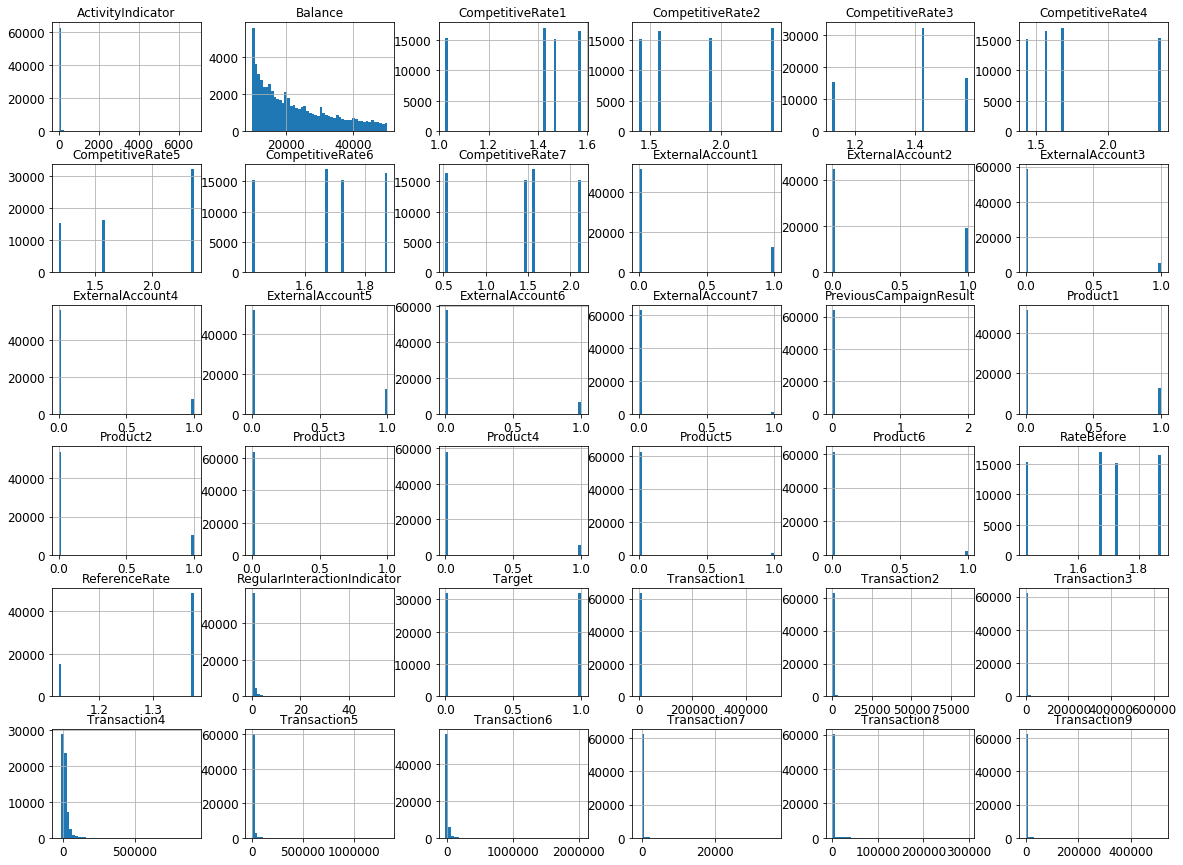

In [8]:
#Part 1 - Explore the data

import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(20,15))
plt.show()

# Splitting Data and Transformations

In [9]:
X = df_train[columns_predictors]
y = df_train[TARGET]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10086, stratify=y) #stratified sampling based on the target
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (47999, 35)
X_test.shape: (16000, 35)
y_train.shape: (47999,)
y_test.shape: (16000,)


In [10]:
#Create numerical pipeline to transform numerical values

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder ,StandardScaler

#Convert the non transformed Dataframe into list.
columns_categorical_list = list(columns_categorical)
columns_numerical_list = list(columns_numerical)

pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder(handle_unknown='error')),
])

pipeline_numerical = Pipeline([
  ('scaler', StandardScaler()),
])

pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical_list),
  ("numerical", pipeline_numerical, columns_numerical_list),
])

In [11]:
pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical),
  ("numerical", pipeline_numerical, columns_numerical),
])

pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)
df_test_1_transformed = pipeline_full.transform(df_test_1)
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")
print(f"df_test_1_transformed.shape: {df_test_1_transformed.shape}")

X_train_transformed.shape: (47999, 51)
X_test_transformed.shape: (16000, 51)
df_test_1_transformed.shape: (1480, 51)


# Binary Classification 

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train_transformed, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
sgd_clf.predict(X_test_transformed)

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_test_transformed, y_test, cv=3, scoring="accuracy")

array([0.57855268, 0.55147197, 0.60022501])

In [15]:
from sklearn.base import BaseEstimator
class ZeroClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [16]:
Zero_clf = ZeroClassifier()
cross_val_score(Zero_clf, X_train_transformed, y_train, cv=3, scoring="accuracy")

array([0.4964375 , 0.5056875 , 0.49853116])

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_transformed, y_train, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[17403,  6607],
       [12456, 11533]], dtype=int64)

In [19]:
y_train_perfect_predictions = y_train  # pretend we reached perfection
confusion_matrix(y_train, y_train_perfect_predictions)

array([[24010,     0],
       [    0, 23989]], dtype=int64)

In [20]:
from sklearn.metrics import precision_score, recall_score

print("Precision Score:", precision_score(y_train, y_train_pred))
print("Recall Score:", recall_score(y_train, y_train_pred))

Precision Score: 0.6357772877618523
Recall Score: 0.48076201592396517


In [21]:
from sklearn.metrics import f1_score

print("F1 Score:", f1_score(y_train, y_train_pred))

F1 Score: 0.5475088418903844


In [22]:
y_scores = sgd_clf.decision_function(df_test_1_transformed)
y_scores

array([-0.80986875, -0.88933091, -1.31001232, ..., -0.9635658 ,
        0.00581489, -0.94112986])

In [23]:
y_scores = cross_val_predict(sgd_clf, X_train_transformed, y_train, cv=3,
                             method="decision_function")

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [25]:
(y_train_pred == (y_scores > 0)).all()

True

In [26]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.6402355956253655

In [27]:
submission_SGDC = sgd_clf.predict(df_test_1_transformed)
submission_SGDC

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [32]:


Customer_ID = df_test['Customer_id']
my_submission_SGDC = pd.DataFrame({
                  "Customer_id": Customer_ID, 
                  "Target": submission_SGDC})
my_submission_SGDC.to_csv('my_submission_SGDC.csv', index=False)

#my_submission_SGDC = pd.DataFrame({'Customer_id': df_test.Customer_id, 'Target': submission_SGDC})
#my_submission_SGDC.to_csv('my_submission_SGDC.csv', index=False)
#from google.colab import files
#files.download("my_submission_SGDC.csv")

In [ ]:
# Not sure about this, should we keep it?

from sklearn.metrics import roc_curve

#for random forest
fpr, tpr, thresholds = roc_curve(y_train,y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
#Plot the Roc Curve
plot_roc_curve(fpr, tpr, "Binary Classification")

plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
# Not sure about this, should we keep it?

# keep probabilities for the positive outcome only
#y_binary_scores = y_train_pred[:, 1] # score = proba of positive class
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
# get the best threshold
J = tpr - fpr
J.max()
best_thresh = J.max()
#J = J.astype(int)
#ix = np.argmax(J)
#best_thresh = thresholds[ix]
best_thresh

In [ ]:
# Not sure about this, should we keep it?

#threshold = 0.11

y_df_test_pred = (y_scores > best_thresh)

print(precision_score(y_train, y_df_test_pred ))
print(recall_score(y_train, y_df_test_pred ))
y_df_test_pred

In [ ]:
# Not sure about this, should we keep it?

from sklearn.model_selection import cross_val_score

Average_Score = cross_val_score(sgd_clf, X_train_transformed, y_df_test_pred, cv = 6, scoring = "f1")

print(Average_Score) 

print(np.average(Average_Score))

In [ ]:
# Not sure about this, should we keep it?

NewR_Threshhold = y_df_test_pred.astype(int)

sgd_clf_final = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf_final.fit(X_train_transformed, NewR_Threshhold)

In [ ]:
# Not sure about this, should we keep it?

submission_SGDC = sgd_clf.predict(df_test_1_transformed)
submission_SGDC

In [ ]:
# Not sure about this, should we keep it?

my_submission_SGDC = pd.DataFrame({'Customer_id': df_test.Customer_id, 'Target': submission_SGDC})
my_submission_SGDC.to_csv('my_submission_SGDC.csv', index=False)
from google.colab import files
files.download("my_submission_SGDC.csv")

# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train_transformed, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [34]:
y_knn_pred = knn_clf.predict(X_test_transformed)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.5538125

In [36]:
y_knn_pred_df_test = knn_clf.predict(df_test_1_transformed)
y_knn_pred_df_test

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn_clf, X_test_transformed, y_test, cv=3, scoring="accuracy")

array([0.5568054 , 0.54472155, 0.53478342])

In [38]:
Customer_ID = df_test['Customer_id']
my_submission_KNN = pd.DataFrame({
                  "Customer_id": Customer_ID, 
                  "Target": y_knn_pred_df_test})
my_submission_KNN.to_csv('my_submission_KNN.csv', index=False)

#my_submission_KNN = pd.DataFrame({'Customer_id': df_test.Customer_id, 'Target': y_knn_pred_df_test})
#my_submission_KNN.to_csv('my_submission_KNN.csv', index=False)
#from google.colab import files
#files.download("my_submission_KNN.csv")

# Voting Classifiers

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [40]:
voting_clf.fit(X_train_transformed, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [41]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6145
RandomForestClassifier 0.59275
SVC 0.6181875
VotingClassifier 0.6216875


In [42]:
y_pred_final_HardVoting = voting_clf.predict(df_test_1_transformed)

In [43]:
y_pred_final_HardVoting

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [44]:
Customer_ID = df_test['Customer_id']
my_submission_HardVoting = pd.DataFrame({
                  "Customer_id": Customer_ID, 
                  "Target": y_pred_final_HardVoting})
my_submission_HardVoting.to_csv('my_submission_HardVoting.csv', index=False)

#my_submission_HardVoting = pd.DataFrame({'Customer_id': df_test.Customer_id, 'Target': y_pred_final_HardVoting})
#my_submission_HardVoting.to_csv('my_submission_HardVoting.csv', index=False)
#from google.colab import files
#files.download("my_submission_HardVoting.csv")

In [45]:
# soft voting

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf2 = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf2.fit(X_train_transformed, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [46]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf2):
    clf.fit(X_train_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6145
RandomForestClassifier 0.59275
SVC 0.6181875
VotingClassifier 0.6165


In [47]:
y_pred_final_SoftVoting = svm_clf.predict(df_test_1_transformed)
y_pred_final_SoftVoting

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [48]:
Customer_ID = df_test['Customer_id']
my_submission_SoftVoting = pd.DataFrame({
                  "Customer_id": Customer_ID, 
                  "Target": y_pred_final_SoftVoting})
my_submission_SoftVoting.to_csv('my_submission_SoftVoting.csv', index=False)

#my_submission_SoftVoting = pd.DataFrame({'Customer_id': df_test.Customer_id, 'Target': y_pred_final_SoftVoting})
#my_submission_SoftVoting.to_csv('my_submission_SoftVoting.csv', index=False)
#from google.colab import files
#files.download("my_submission_SoftVoting.csv")

# Bagging Ensembles

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train_transformed, y_train)
y_pred = bag_clf.predict(X_test_transformed)

In [50]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6258125


In [51]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_transformed, y_train)
y_pred_tree = tree_clf.predict(X_test_transformed)
print(accuracy_score(y_test, y_pred_tree))

0.5380625


Regular decision tree model performed worse comapared to the bagging classifier model. 

In [52]:
# Make a random forest

#bag_clf = BaggingClassifier(
#    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
#    n_estimators=500, random_state=42)

In [53]:
#bag_clf.fit(X_train_transformed, y_train)
#y_pred = bag_clf.predict(X_test_transformed)

In [54]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train_transformed, y_train)

y_pred_rf = rnd_clf.predict(X_test_transformed)

In [55]:
for name, score in sorted(zip(X_train.columns, rnd_clf.feature_importances_), key=lambda x: x[1],reverse=True):
    print(name, score)

CompetitiveRate6 0.05462171186889403
Product6 0.04131108578202509
Transaction1 0.033896152424196066
ReferenceRate 0.02121643817948723
Product5 0.015514924114890619
Product4 0.013592736614498446
RateBefore 0.004902373763064334
CompetitiveRate7 0.002802080170774556
RegularInteractionIndicator 0.0014850213358336818
CompetitiveRate1 0.0014377070543896333
Transaction7 0.0013803698439623167
Transaction6 0.0011638021397245627
Transaction8 0.0009176747820424043
Transaction9 0.0008188891120991244
ExternalAccount3 0.000528174155948301
Transaction4 0.0005192690731184816
Transaction5 0.0004427886450015501
CompetitiveRate5 0.00029670008606727457
ExternalAccount4 0.00027512644316477175
CompetitiveRate4 0.00022273755747741612
ExternalAccount5 0.0001820814055819906
ExternalAccount6 0.00017895275909870793
ExternalAccount2 0.0001407275458108239
Transaction2 0.00013319869747337084
Transaction3 9.472171784079228e-05
ExternalAccount1 9.357551957313676e-05
CompetitiveRate2 9.284632889143638e-05
PreviousCamp

In [56]:
rnd_clf.feature_importances_

array([3.80918570e-05, 8.40698677e-05, 3.64902811e-05, 6.98746602e-05,
       0.00000000e+00, 1.35927366e-02, 1.55149241e-02, 4.13110858e-02,
       3.38961524e-02, 1.33198697e-04, 9.47217178e-05, 5.19269073e-04,
       4.42788645e-04, 1.16380214e-03, 1.38036984e-03, 9.17674782e-04,
       8.18889112e-04, 9.35755196e-05, 1.40727546e-04, 5.28174156e-04,
       2.75126443e-04, 1.82081406e-04, 1.78952759e-04, 8.13975519e-05,
       3.62404835e-05, 1.48502134e-03, 1.43770705e-03, 9.28463289e-05,
       8.13149586e-05, 2.22737557e-04, 2.96700086e-04, 5.46217119e-02,
       2.80208017e-03, 4.90237376e-03, 2.12164382e-02, 3.77397494e-01,
       9.24129754e-02, 3.50222870e-02, 5.91657273e-03, 8.81054605e-03,
       2.22587035e-02, 2.54819589e-01, 3.30799134e-03, 1.82485045e-04,
       3.06736979e-04, 1.02441695e-04, 2.35088114e-04, 1.01078039e-04,
       9.93450904e-05, 6.42870067e-05, 2.73032248e-04])

In [57]:
accuracy_score(y_test, y_pred_rf)

0.6218125

In [58]:
y_pred_final_Bagging = bag_clf.predict(df_test_1_transformed)
y_pred_final_Bagging

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [59]:
Customer_ID = df_test['Customer_id']
my_submission_Bagging = pd.DataFrame({
                  "Customer_id": Customer_ID, 
                  "Target": y_pred_final_Bagging})
my_submission_Bagging.to_csv('my_submission_Bagging.csv', index=False)

#my_submission_Bagging = pd.DataFrame({'Customer_id': df_test.Customer_id, 'Target': y_pred_final_Bagging})
#my_submission_Bagging.to_csv('my_submission_Bagging.csv', index=False)
#from google.colab import files
#files.download("my_submission_Bagging.csv")

In [60]:
out_bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
out_bag_clf.fit(X_train_transformed, y_train)
out_bag_clf.oob_score_

0.5995124898435384

In [61]:
out_bag_clf.oob_decision_function_

array([[0.39306358, 0.60693642],
       [0.52525253, 0.47474747],
       [0.36686391, 0.63313609],
       ...,
       [0.43684211, 0.56315789],
       [0.89534884, 0.10465116],
       [0.51851852, 0.48148148]])

In [62]:
y_pred_outofbag = out_bag_clf.predict(X_test_transformed)
accuracy_score(y_test, y_pred_outofbag)

0.602125

In [63]:
y_pred_final_outofbag = out_bag_clf.predict(df_test_1_transformed)
y_pred_final_outofbag

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [97]:
Customer_ID = df_test['Customer_id']
my_submission_outofbag = pd.DataFrame({
                  "Customer_id": Customer_ID, 
                  "Target": y_pred_final_outofbag})
my_submission_outofbag.to_csv('my_submission_outofbag.csv', index=False)


#my_submission_outofbag = pd.DataFrame({'Customer_id': df_test.Customer_id, 'Target': y_pred_final_outofbag})
#my_submission_outofbag.to_csv('my_submission_outofbag.csv', index=False)
#from google.colab import files
#files.download("my_submission_outofbag.csv")

# In-Depth Import Libraries 

In [65]:
#import the libraries for all the classifiers.

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

# Random Forest - In depth

In [66]:
X_train, X_nontrain, y_train, y_nontrain = train_test_split(X, y, test_size=0.25, random_state=10086, stratify=y) #stratified sampling based on the target
print(f"X_train.shape: {X_train.shape}")
print(f"X_nontrain.shape: {X_nontrain.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_nontrain.shape: {y_nontrain.shape}")

X_stack, X_test, y_stack, y_test = train_test_split(X_nontrain, y_nontrain, test_size=0.25, random_state=10086, stratify=y_nontrain) #stratified sampling based on the target
print(f"X_stack.shape: {X_stack.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_stack.shape: {y_stack.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (47999, 35)
X_nontrain.shape: (16000, 35)
y_train.shape: (47999,)
y_nontrain.shape: (16000,)
X_stack.shape: (12000, 35)
X_test.shape: (4000, 35)
y_stack.shape: (12000,)
y_test.shape: (4000,)


In [67]:
pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
X_stack_transformed = pipeline_full.transform(X_stack)
X_test_transformed = pipeline_full.transform(X_test)


print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")
print(f"X_stack_transformed.shape: {X_stack_transformed.shape}")


X_train_transformed.shape: (47999, 51)
X_test_transformed.shape: (4000, 51)
X_stack_transformed.shape: (12000, 51)


In [68]:
# Design the random forest classifier

# Random Forest Classifier

n_estimators = [10, 200]
max_features = [0.1, 0.5]
max_depth = [2, 10, 20] 
oob_score = [True, False]
min_samples_split = [0.1, 0.5]
min_samples_leaf = [0.1, 0.5]
max_leaf_nodes = [2, 10, 100]

parameter_random_forest = {'n_estimators' : n_estimators, 'max_features' : max_features,
                     'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                    'oob_score' : oob_score, 'min_samples_leaf': min_samples_leaf, 
                     'max_leaf_nodes' : max_leaf_nodes}
             
Random_Forest_Classifier = RandomForestClassifier(random_state = 42)

#use grid search to tune the model|

grid_search_RndmForest = GridSearchCV(Random_Forest_Classifier,parameter_random_forest, cv = 4, scoring='roc_auc', refit = True,
                                     n_jobs = -1, verbose=2)

grid_search_RndmForest.fit(X_train_transformed,y_train)
             
forest_best_params_ = grid_search_RndmForest.best_params_
forest_best_estimators_ = grid_search_RndmForest.best_estimator_

print(forest_best_params_)
print(forest_best_estimators_)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.9min finished


{'max_depth': 10, 'max_features': 0.5, 'max_leaf_nodes': 10, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 200, 'oob_score': True}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=0.5,
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)


In [69]:
#Now Predict on the Stack Dataset
from sklearn.metrics import accuracy_score
Random_Forest_estimators = forest_best_estimators_
y_estimator_forest = Random_Forest_estimators.predict(X_stack_transformed)
print(accuracy_score(y_stack, y_estimator_forest))

0.6150833333333333


In [70]:
# Test on the Test Data
y_final_estimator_forest = Random_Forest_estimators.predict(X_test_transformed)
print(accuracy_score(y_test, y_final_estimator_forest))

0.61175


In [71]:
for name, score in sorted(zip(X_stack.columns, Random_Forest_estimators.feature_importances_), key=lambda x: x[1],reverse=True):
    print(name, score)

CompetitiveRate6 0.03562162916470827
Transaction1 0.009497092610830232
Product6 0.003737951983880884
Product5 0.0006075055141721476
Product4 0.00021801763059957672
CompetitiveRate1 9.426543030141179e-05
ExternalAccount3 2.9683134903385734e-05
Balance 0.0
PreviousCampaignResult 0.0
Product1 0.0
Product2 0.0
Product3 0.0
Transaction2 0.0
Transaction3 0.0
Transaction4 0.0
Transaction5 0.0
Transaction6 0.0
Transaction7 0.0
Transaction8 0.0
Transaction9 0.0
ExternalAccount1 0.0
ExternalAccount2 0.0
ExternalAccount4 0.0
ExternalAccount5 0.0
ExternalAccount6 0.0
ExternalAccount7 0.0
ActivityIndicator 0.0
RegularInteractionIndicator 0.0
CompetitiveRate2 0.0
CompetitiveRate3 0.0
CompetitiveRate4 0.0
CompetitiveRate5 0.0
CompetitiveRate7 0.0
RateBefore 0.0
ReferenceRate 0.0


In [72]:
y_final_stack_estimator_forest = Random_Forest_estimators.predict(df_test_1_transformed)

# Adaboost - In Depth

In [73]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators = [700, 100]
learning_rate = [0.001, 0.01, 0.1]
algorithm = ['SAMME', 'SAMME.R']

Ada_Classifer = AdaBoostClassifier(random_state = 42)
parameter_Ada_Classifer = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate, 'algorithm' : algorithm}
grid_search_AdaClassifier = GridSearchCV(Ada_Classifer, parameter_Ada_Classifer, cv = 4, scoring='roc_auc', refit = True, n_jobs = -1, verbose = 2)
grid_search_AdaClassifier.fit(X_train_transformed,y_train)

AdaClassifier_best_params_ = grid_search_AdaClassifier.best_params_
AdaClassifier_best_estimators_ = grid_search_AdaClassifier.best_estimator_
print(AdaClassifier_best_params_)
print(AdaClassifier_best_estimators_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  48 | elapsed:  1.7min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.1min finished


{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 700}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=700, random_state=42)


In [74]:
#check accuracy on stack dataset
AdaClassifier_Estimators = AdaClassifier_best_estimators_
y_estimator_ada = AdaClassifier_Estimators.predict(X_stack_transformed)
print(accuracy_score(y_stack, y_estimator_ada))

0.6235833333333334


In [75]:
# Check the accuracy on the Test Data
y_final_estimator_ada = AdaClassifier_Estimators.predict(X_test_transformed)
print(accuracy_score(y_test, y_final_estimator_ada))

0.62


In [76]:
for name, score in sorted(zip(X_stack.columns, AdaClassifier_Estimators.feature_importances_), key=lambda x: x[1],reverse=True):
    print(name, score)

CompetitiveRate6 0.11714285714285715
ReferenceRate 0.047142857142857146
RateBefore 0.045714285714285714
CompetitiveRate7 0.027142857142857142
Product2 0.018571428571428572
Product4 0.018571428571428572
Product5 0.014285714285714285
Transaction1 0.014285714285714285
Transaction6 0.007142857142857143
CompetitiveRate1 0.007142857142857143
ExternalAccount6 0.005714285714285714
RegularInteractionIndicator 0.005714285714285714
CompetitiveRate4 0.005714285714285714
Transaction9 0.004285714285714286
CompetitiveRate5 0.004285714285714286
Product6 0.002857142857142857
Transaction3 0.002857142857142857
Transaction5 0.002857142857142857
Transaction4 0.0014285714285714286
Transaction7 0.0014285714285714286
Transaction8 0.0014285714285714286
ExternalAccount5 0.0014285714285714286
Balance 0.0
PreviousCampaignResult 0.0
Product1 0.0
Product3 0.0
Transaction2 0.0
ExternalAccount1 0.0
ExternalAccount2 0.0
ExternalAccount3 0.0
ExternalAccount4 0.0
ExternalAccount7 0.0
ActivityIndicator 0.0
CompetitiveRat

In [77]:
y_final_stack_estimator_adaboost = AdaClassifier_Estimators.predict(df_test_1_transformed)

# Extra Trees Classifier - In Depth

In [78]:
Extra_Classifier = ExtraTreesClassifier(random_state = 42)

n_estimators = [400, 700, 1000]
max_features = [0.1, 0.3, 0.5, 1.0]
max_depth = [2, 5]
min_samples_split = [0.1, 0.3, 0.5, 1.0]
min_samples_leaf = [0.0001, 0.001, 0.1, 1.0] # Mhm, this one leads to accuracy of test and train sets being the same.|

parameter_Extra_Classifier = {'n_estimators' : n_estimators, 'max_features' : max_features,
                         'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                         'min_samples_leaf' : min_samples_leaf}

grid_search_ExtraClassifier = GridSearchCV(Extra_Classifier, parameter_Extra_Classifier, cv = 4, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2)
grid_search_ExtraClassifier.fit(X_train_transformed,y_train)

Extra_Classifier_best_params_ = grid_search_ExtraClassifier.best_params_
Extra_Classifier_best_estimators_ = grid_search_ExtraClassifier.best_estimator_
print(Extra_Classifier_best_params_)
print(Extra_Classifier_best_estimators_)

Fitting 4 folds for each of 384 candidates, totalling 1536 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 1536 out of 1536 | elapsed: 40.5min finished


{'max_depth': 5, 'max_features': 1.0, 'min_samples_leaf': 0.0001, 'min_samples_split': 0.1, 'n_estimators': 400}
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=0.0001, min_samples_split=0.1,
                     min_weight_fraction_leaf=0.0, n_estimators=400,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


In [79]:
#check accuracy on stack data
ExtraClassifier_Estimators = Extra_Classifier_best_estimators_
y_estimator_extra = ExtraClassifier_Estimators.predict(X_stack_transformed)
print(accuracy_score(y_stack, y_estimator_extra))

0.6020833333333333


In [80]:
# check the accuracy on the Test Data
y_final_estimator_extra = ExtraClassifier_Estimators.predict(X_test_transformed)
print(accuracy_score(y_test, y_final_estimator_extra))

0.6045


In [81]:
for name, score in sorted(zip(X_stack.columns, ExtraClassifier_Estimators.feature_importances_), key=lambda x: x[1],reverse=True):
    print(name, score)

Product6 0.20966374947192437
Transaction1 0.19908086209271433
CompetitiveRate6 0.1351370508862961
Product5 0.03932865975993817
Product4 0.03607610716999099
Transaction7 0.005829291222279885
Transaction6 0.005559208278822481
ExternalAccount3 0.0022787168063889206
ExternalAccount4 0.0021001084232334885
Transaction4 0.0019145898901727324
Transaction5 0.0012037246900454912
Transaction8 0.0005860904590217055
Transaction9 0.0005641156718250319
RegularInteractionIndicator 0.00043649209158801687
RateBefore 0.0004357850201825488
ReferenceRate 0.0003715801217798446
CompetitiveRate1 0.00025190173056178155
PreviousCampaignResult 9.429736843790148e-05
Balance 7.967911851821333e-05
Transaction2 5.655490376298945e-05
CompetitiveRate7 4.2327480642043035e-05
CompetitiveRate5 3.149062105837833e-05
CompetitiveRate4 2.183617741656478e-05
Transaction3 1.5280183079541534e-05
CompetitiveRate3 6.29870833298017e-06
ExternalAccount5 3.406464912741153e-06
Product1 0.0
Product2 0.0
Product3 0.0
ExternalAccount1 0

In [82]:
y_final_stack_estimator_extra = ExtraClassifier_Estimators.predict(df_test_1_transformed)

# Gradient Boosting Classifier - In Depth

In [83]:
# Gradient Boosting Classifier

GB_Classifier = GradientBoostingClassifier(random_state = 42)

n_estimators = [500, 1200, 2000]
learning_rate = [0.1, 0.0001, 0.001, 0.1]
max_depth = [2, 20]
min_samples_split = [0.1, 0.4]
min_samples_leaf = [2, 3]
max_features = [4, 7]
max_leaf_nodes = [2, 3]
                            
parameter_GB_Classifier = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate,
                              'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                              'min_samples_leaf' : min_samples_leaf, 'max_features' : max_features,
                              'max_leaf_nodes' : max_leaf_nodes}

grid_search_GB_Classifier = GridSearchCV(GB_Classifier, parameter_GB_Classifier, cv = 4, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2)

grid_search_GB_Classifier.fit(X_train_transformed,y_train)

GB_Classifier_best_params_ = grid_search_GB_Classifier.best_params_

GB_Classifier_best_estimators_ = grid_search_GB_Classifier.best_estimator_

print(GB_Classifier_best_params_)

print(GB_Classifier_best_estimators_)

Fitting 4 folds for each of 384 candidates, totalling 1536 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 1536 out of 1536 | elapsed: 39.5min finished


{'learning_rate': 0.1, 'max_depth': 2, 'max_features': 7, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'min_samples_split': 0.1, 'n_estimators': 1200}
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=7, max_leaf_nodes=3,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=0.1,
                           min_weight_fraction_leaf=0.0, n_estimators=1200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [84]:
#Now Predict on the Stack Dataset
GB_estimators = GB_Classifier_best_estimators_
y_estimator_GB = GB_estimators.predict(X_stack_transformed)
print(accuracy_score(y_stack, y_estimator_GB))

0.6268333333333334


In [85]:
# check the accuracy on the Test Data
y_final_estimator_GB = GB_estimators.predict(X_test_transformed)
print(accuracy_score(y_test, y_final_estimator_GB))

0.6255


In [86]:
y_final_stack_estimator_GB = GB_estimators.predict(df_test_1_transformed)

# Combining Models

In [87]:
print(y_estimator_forest.shape)
print(y_estimator_ada.shape)
print(y_estimator_extra.shape)
print(y_estimator_GB.shape)

(12000,)
(12000,)
(12000,)
(12000,)


In [88]:
# Now build the Stacking model
import numpy as np

Final_test_X = np.vstack((y_final_estimator_forest, y_final_estimator_ada, y_final_estimator_extra, y_final_estimator_GB))

Final_test_X = Final_test_X.T
Final_test_X.shape # now we get the right number of rows and columns

(4000, 4)

In [89]:
# Now build the Stacking model
import numpy as np

Final_Stacking_X = np.vstack((y_estimator_forest, y_estimator_ada, y_estimator_extra, y_estimator_GB))

Final_Stacking_X = Final_Stacking_X.T
Final_Stacking_X.shape # now we get the right number of rows and columns

(12000, 4)

In [90]:
# Additionally we can check the Stack performance on the Logistic Regression model, 

Logistic_Regression = LogisticRegression(random_state = 42)
C = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
                            
parameter_LogReg = {'C' : C}
grid_search_LogReg = GridSearchCV(Logistic_Regression, parameter_LogReg, cv = 9, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2)

grid_search_LogReg.fit(Final_Stacking_X,y_stack)
LogReg_New_best_params = grid_search_LogReg.best_params_
LogReg_New_best_estimators = grid_search_LogReg.best_estimator_

print(LogReg_New_best_params)
print(LogReg_New_best_estimators)

Fitting 9 folds for each of 6 candidates, totalling 54 fits
{'C': 0.0001}
LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  54 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.0s finished


In [91]:
# Now check the accuracy of the Stacked Training set with the original Model Stacking Y.
y_estimator_LogReg = LogReg_New_best_estimators.predict(Final_Stacking_X)
print(accuracy_score(y_stack, y_estimator_LogReg))

0.6253333333333333


In [92]:
# Now check the accuracy of the Stacked Training set with the original Test Y
y_final_estimator_LogReg = LogReg_New_best_estimators.predict(Final_test_X)
print(accuracy_score(y_test,y_final_estimator_LogReg))

0.61775


In [93]:
Final_df_test = np.vstack((y_final_stack_estimator_forest, y_final_stack_estimator_adaboost, y_final_stack_estimator_extra, y_final_stack_estimator_GB))

Final_df_test = Final_df_test.T
Final_df_test.shape # now we get the right number of rows and columns

(1480, 4)

In [94]:
submission_FinalStackX = LogReg_New_best_estimators.predict(Final_df_test)
submission_FinalStackX

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [96]:
Customer_ID = df_test['Customer_id']
my_submission_FinalStackX = pd.DataFrame({
                  "Customer_id": Customer_ID, 
                  "Target": submission_FinalStackX})
my_submission_FinalStackX.to_csv('my_submission_FinalStackX.csv', index=False)

#my_submission_FinalStackX = pd.DataFrame({'Customer_id': df_test.Customer_id, 'Target': submission_FinalStackX})
#my_submission_FinalStackX.to_csv('my_submission_FinalStackX.csv', index=False)
#from google.colab import files
#files.download("my_submission_FinalStackX.csv")